### Visualizing F-distribution under null hypothesis.

mean = 107

sd = 2

One way ANOVA with degrees of freedom 2 and 21, i.e. 3 groups and 8 samples with one factor.


### Sample dataset

In [23]:
import pandas as pd

data = pd.DataFrame()
data['group1'] = np.random.normal(mean, sd, 8)
data['group2'] = np.random.normal(mean, sd, 8)
data['group3'] = np.random.normal(mean, sd, 8)

data = data.round(decimals=1)
data

,group1,group2,group3
0,102.7,105.6,108.5
1,106.0,108.1,107.0
2,106.8,107.2,106.5
3,109.1,102.8,107.8
4,102.7,110.3,106.7
5,106.6,108.1,106.4
6,103.3,107.6,110.0
7,110.8,107.0,106.3


We will make 1 lakh such datasets with same mean and standard deviation and calculate F-values for each.

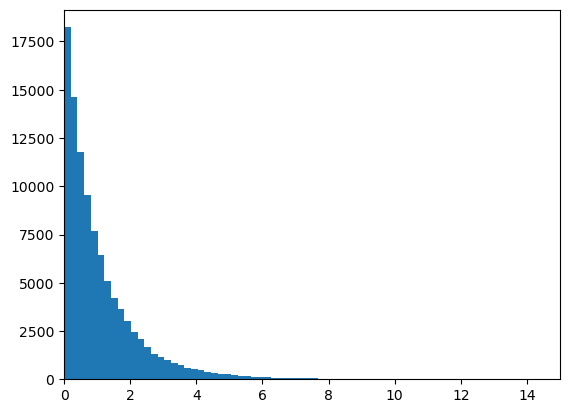

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway as anova


def get_f_val_dist(mean, sd, size=8):
    
    '''
    Given mean and standard deviation create 1 lakh sampling datasets of
    3 treatment groups with 8 samples each.
    
    Calculates f-value for each dataset and return all F-values
    '''
    # empty F-value list
    f_values = []

    # iterate 1 lakh times
    for i in range(100000):
        
        # generate dataset with mean and sd
        
        d1 = np.random.normal(mean, sd, size)
        d2 = np.random.normal(mean, sd, size)
        d3 = np.random.normal(mean, sd, size)
        
        # perform one-way anova
        res = anova(d1,d2,d3)

        #append calculated f-value
        f_values.append(res.statistic)
        
    return f_values

    

mean = 107
sd = 2
f_values = get_f_val_dist(mean, sd)

# plot histogram of calculated F-values
plt.hist(f_values, bins=100)
plt.xlim(0,15)
plt.show()

In [25]:
mean1 = 107
sd1 = 2
f_values1 = get_f_val_dist(mean1, sd1)

mean2 = 205
sd2 = 10
f_values2 = get_f_val_dist(mean2, sd2)



In [26]:
# make a table of the percentiles for both F-distributions

arr1 = np.array(f_values1)
arr2 = np.array(f_values2)


f_df = pd.DataFrame() # DataFrame
f_df['percentile'] = np.array(range(0,100,10))
f_df['mean1'] = [round(np.percentile(arr1,x), 2) for x in range(0,100,10)]
f_df['mean2'] = [round(np.percentile(arr2,x), 2) for x in range(0,100,10)]

f_df


,percentile,mean1,mean2
0,0,0.00,0.00
1,10,0.11,0.11
2,20,0.22,0.23
3,30,0.36,0.37
4,40,0.52,0.53
5,50,0.71,0.72
6,60,0.95,0.96
7,70,1.27,1.28
8,80,1.72,1.75
9,90,2.55,2.59


Note that the percentile values for both means ans standard deviation is similar indicating that the F-distribution doesn't depend on mean and sd.

In [30]:
f_values3 = get_f_val_dist(mean1, sd1, size=12)
arr3 = np.array(f_values3)


In [31]:
f_df['size12_mean1'] = [round(np.percentile(arr3,x), 2) for x in range(0,100,10)]
f_df

,percentile,mean1,mean2,size12_mean1
0,0,0.00,0.00,0.00
1,10,0.11,0.11,0.11
2,20,0.22,0.23,0.23
3,30,0.36,0.37,0.36
4,40,0.52,0.53,0.52
5,50,0.71,0.72,0.71
6,60,0.95,0.96,0.95
7,70,1.27,1.28,1.25
8,80,1.72,1.75,1.69
9,90,2.55,2.59,2.47


We see that the percentile values change when we change the number of patients in each group.
ALthough we have a table of F-distribution available to us and it is calculated by a formula, it is nice to visualize how the F-values actually vary when we simulate the sampling.